In [1]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
from datetime import date
import numpy as np

In [2]:
#ensuring version
import pandas_datareader
print (pandas_datareader.__version__)

0.9.0


In [27]:
# Define the instruments to download. We would like to see Apple, Microsoft and others.
companies_dict = {
"Tata Consultancy Services Limited":"TCS.NS",
"Bajaj Auto Limited":"BAJAJ-AUTO.NS",
"Shree Cement Limited":"SHREECEM.NS",
"Maruti Suzuki India Limited":"MARUTI.NS",
"Hero MotoCorp Limited":"HEROMOTOCO.NS",
"UltraTech Cement Limited":"ULTRACEMCO.NS",
"Grasim Industries Limited":"GRASIM.NS",
"Bajaj Finance Limited":"BAJFINANCE.NS",
"ICICI Bank Limited":"ICICIBANK.NS",
"Coal India Limited":"COALINDIA.NS",
"Larsen & Toubro Limited":"LT.NS",
"Titan Company Limited":"TITAN.NS",
"Nestlé India Limited":"NESTLEIND.NS",
"IndusInd Bank Limited":"INDUSINDBK.NS",
"Hindalco Industries Limited":"HINDALCO.NS",
"Tata Steel Limited":"TATASTEEL.NS",
"Mahindra & Mahindra":"M&M.NS",
"Wipro Limited":"WIPRO.NS",
"Reliance Industries Limited":"RELIANCE.NS",
"Cipla Limited":"CIPLA.NS",
"Tech Mahindra Limited":"TECHM.NS",
"Britannia Industries Limited":"BRITANNIA.NS",
"GAIL (India) Limited":"GAIL.NS",
"NTPC Limited":"NTPC.NS",
"Kotak Mahindra Bank Limited":"KOTAKBANK.NS",
"Oil and Natural Gas Corporation Limited":"ONGC.NS",
"ITC Limited":"ITC.NS",
"Bajaj Finserv Limited":"BAJAJFINSV.NS",
"Bharti Airtel Limited":"BHARTIARTL.NS"
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)


[('Bajaj Auto Limited', 'BAJAJ-AUTO.NS'), ('Bajaj Finserv Limited', 'BAJAJFINSV.NS'), ('Bajaj Finance Limited', 'BAJFINANCE.NS'), ('Bharti Airtel Limited', 'BHARTIARTL.NS'), ('Britannia Industries Limited', 'BRITANNIA.NS'), ('Cipla Limited', 'CIPLA.NS'), ('Coal India Limited', 'COALINDIA.NS'), ('GAIL (India) Limited', 'GAIL.NS'), ('Grasim Industries Limited', 'GRASIM.NS'), ('Hero MotoCorp Limited', 'HEROMOTOCO.NS'), ('Hindalco Industries Limited', 'HINDALCO.NS'), ('ICICI Bank Limited', 'ICICIBANK.NS'), ('IndusInd Bank Limited', 'INDUSINDBK.NS'), ('ITC Limited', 'ITC.NS'), ('Kotak Mahindra Bank Limited', 'KOTAKBANK.NS'), ('Larsen & Toubro Limited', 'LT.NS'), ('Mahindra & Mahindra', 'M&M.NS'), ('Maruti Suzuki India Limited', 'MARUTI.NS'), ('Nestlé India Limited', 'NESTLEIND.NS'), ('NTPC Limited', 'NTPC.NS'), ('Oil and Natural Gas Corporation Limited', 'ONGC.NS'), ('Reliance Industries Limited', 'RELIANCE.NS'), ('Shree Cement Limited', 'SHREECEM.NS'), ('Tata Steel Limited', 'TATASTEEL.NS'

In [28]:
# Defining which online source one should use
data_source = 'yahoo'

# Defining the start and end dates that we want to see
start_date = '2017-01-01'
end_date = '2020-12-31'

# INPX = data.DataReader('INPX', 'yahoo', start_date, end_date)

# User pandas_reader.data.DataReader to load the desired data. As simple as that.

# Converted to list as starting 3.5 dict.values does not return list
#print(type(data.DataReader(list(companies_dict.values()), "yahoo", start_date, end_date).unstack(level=0)))
#panel_data = data.DataReader(list(companies_dict.values()), "yahoo", start_date, end_date)

# Use pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

# Print Axes Labels
#print(panel_data.axes)

# Find Stock Open and Close Values
stock_close_ = panel_data['Close']
stock_open_ = panel_data['Open']

print(stock_close_.iloc[0])
#print(stock_open.iloc[0])


Symbols
BAJAJ-AUTO.NS     2598.500000
BAJAJFINSV.NS     2949.649902
BAJFINANCE.NS      870.049988
BHARTIARTL.NS      285.553009
BRITANNIA.NS      1443.219971
CIPLA.NS           566.000000
COALINDIA.NS       300.049988
GAIL.NS            122.386002
GRASIM.NS          676.442993
HEROMOTOCO.NS     3030.550049
HINDALCO.NS        158.850006
ICICIBANK.NS       229.044998
INDUSINDBK.NS     1087.449951
ITC.NS             240.949997
KOTAKBANK.NS       714.799988
LT.NS              906.400024
M&M.NS             614.900024
MARUTI.NS         5466.000000
NESTLEIND.NS      5974.399902
NTPC.NS            137.332993
ONGC.NS            192.250000
RELIANCE.NS        542.549988
SHREECEM.NS      14517.599609
TATASTEEL.NS       387.526001
TCS.NS            1180.680054
TECHM.NS           488.000000
TITAN.NS           333.950012
ULTRACEMCO.NS     3371.350098
WIPRO.NS           176.830994
Name: 2017-01-02 00:00:00, dtype: float64


In [29]:
# Calculate daily stock movement
# Converting to numpy array 
#.T gives row vector ==> 1 stock * n days * k stocks
stock_close = np.array(stock_close_).T
stock_open = np.array(stock_open_).T

row, col = stock_close.shape

print("Number of rows(companies):",row)
print("Number of cols(days):",col)
movements = np.zeros([row, col])


#change in stock value on each day
for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

Number of rows(companies): 29
Number of cols(days): 987


In [30]:
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0],sum(movements[i][:])))
    
print(movements.shape)

Company: Bajaj Auto Limited, Change: -2714.8968505859375
Company: Bajaj Finserv Limited, Change: -5359.705810546875
Company: Bajaj Finance Limited, Change: -603.6491088867188
Company: Bharti Airtel Limited, Change: -289.09539794921875
Company: Britannia Industries Limited, Change: -3455.6058349609375
Company: Cipla Limited, Change: -1088.7003479003906
Company: Coal India Limited, Change: -357.5503387451172
Company: GAIL (India) Limited, Change: -301.0509948730469
Company: Grasim Industries Limited, Change: -842.8359680175781
Company: Hero MotoCorp Limited, Change: -5317.9488525390625
Company: Hindalco Industries Limited, Change: -189.85010528564453
Company: ICICI Bank Limited, Change: -92.76622009277344
Company: IndusInd Bank Limited, Change: -1789.7996520996094
Company: ITC Limited, Change: -471.1001281738281
Company: Kotak Mahindra Bank Limited, Change: 115.59881591796875
Company: Larsen & Toubro Limited, Change: -1661.2047119140625
Company: Mahindra & Mahindra, Change: -1006.2999877

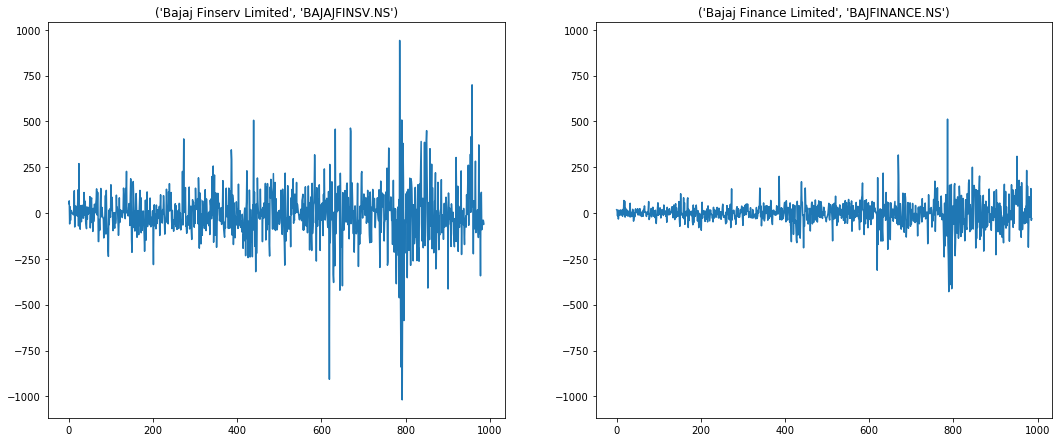

In [41]:
# Visualization - Plot Stock Movements
%matplotlib inline
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(movements[1][:])
plt.title(companies[1])

plt.subplot(222, sharey=ax1)
plt.plot(movements[2][:])
plt.title(companies[2])
plt.show()

#Not So Good--> Market cap of compnies varies => change in value/movement not a good factor
#Normalize Movement

In [43]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2643979567765093
-0.23326970989205817
-0.0019125186332688286


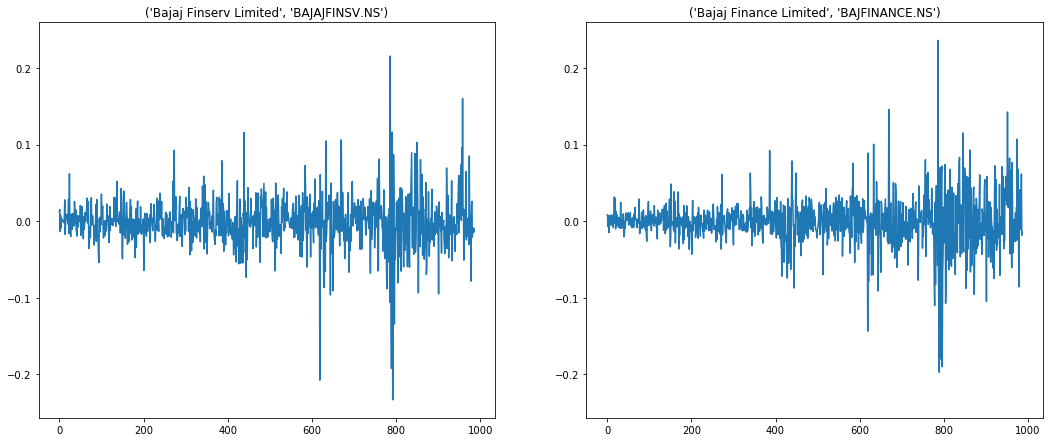

In [44]:
# Visualization - Plot Stock Normalized
%matplotlib inline
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[1][:])
plt.title(companies[1])

plt.subplot(222, sharey=ax1)
plt.plot(new[2][:])
plt.title(companies[2])
plt.show()

In [73]:
# Import Normalizer (not required importing just for clarity)
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Normalizer for use in pipeline
normalizer = Normalizer()

# Create a KMeans model with 16 clusters: kmeans
kmeans = KMeans(n_clusters=10, max_iter=2000)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(new)

print(kmeans.inertia_)


11.523202955807106


In [71]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))



                                            companies  labels
3              (Bharti Airtel Limited, BHARTIARTL.NS)       0
8              (Grasim Industries Limited, GRASIM.NS)       0
14        (Kotak Mahindra Bank Limited, KOTAKBANK.NS)       1
1              (Bajaj Finserv Limited, BAJAJFINSV.NS)       1
2              (Bajaj Finance Limited, BAJFINANCE.NS)       1
26                  (Titan Company Limited, TITAN.NS)       1
21         (Reliance Industries Limited, RELIANCE.NS)       1
12             (IndusInd Bank Limited, INDUSINDBK.NS)       1
11                 (ICICI Bank Limited, ICICIBANK.NS)       1
17           (Maruti Suzuki India Limited, MARUTI.NS)       2
16                      (Mahindra & Mahindra, M&M.NS)       2
0                 (Bajaj Auto Limited, BAJAJ-AUTO.NS)       2
9              (Hero MotoCorp Limited, HEROMOTOCO.NS)       2
4        (Britannia Industries Limited, BRITANNIA.NS)       3
18               (Nestlé India Limited, NESTLEIND.NS)       3
13      

                                            companies  labels
28                          (Wipro Limited, WIPRO.NS)       0
25                  (Tech Mahindra Limited, TECHM.NS)       0
24        (Tata Consultancy Services Limited, TCS.NS)       0
15                   (Larsen & Toubro Limited, LT.NS)       1
27          (UltraTech Cement Limited, ULTRACEMCO.NS)       1
12             (IndusInd Bank Limited, INDUSINDBK.NS)       1
11                 (ICICI Bank Limited, ICICIBANK.NS)       1
17           (Maruti Suzuki India Limited, MARUTI.NS)       1
20  (Oil and Natural Gas Corporation Limited, ONGC...       2
6                  (Coal India Limited, COALINDIA.NS)       2
19                            (NTPC Limited, NTPC.NS)       2
7                     (GAIL (India) Limited, GAIL.NS)       2
18               (Nestlé India Limited, NESTLEIND.NS)       3
21         (Reliance Industries Limited, RELIANCE.NS)       3
4        (Britannia Industries Limited, BRITANNIA.NS)       3
8       

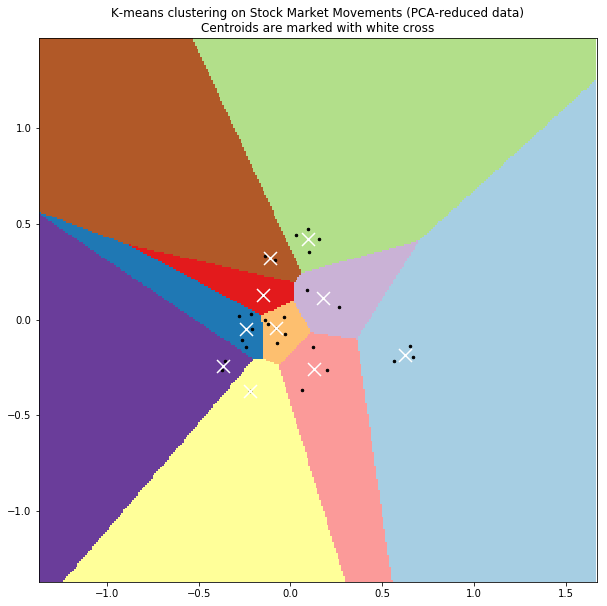

0.1300643715223432


In [72]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

print(kmeans.inertia_)